In [1]:
import numpy as np
#This files contains tidal data Harmonics obtained for the period 1st January 2020 to 1st Febraury 2020 
#f=open("https://drive.google.com/file/d/1aJ9-yN7red24Zo9CuOxFSZckto02oEDS/view?usp=sharing","+r").readlines()
f=open("harmonic_dict.txt","+r").readlines()

In [2]:
harArr=np.asarray([np.asarray([row.split()[2:][i] for i in range(3)]) for row in f[2:]])

In [3]:
harArr=np.asarray([np.asarray([float(elem.replace('D','E')) for elem in line]) for line in harArr])

In [4]:
harArr.shape

(44, 3)

In [5]:
timeStart=631108800# time elapsed from epoch in secs date-1st January 2020 epoch-1st January 2000
timeStop=timeStart+24*60*60*31# time elapsed from epoch in secs 1st February 2020
intvl=int((timeStop-timeStart)/60)
t=np.linspace(timeStart,timeStop,intvl)

In [6]:
len(t)

44640

In [7]:
tidalDispTimeSer=np.zeros([17,len(t)])

In [8]:
tidalDispTimeSer[0].shape

(44640,)

The files ATOM0_tidalDisp.txt,ATOM1_tidalDisp.txt contain the cosine and sine tidal height amplitude data along up, east and north directions. While the harmonic_dict.txt data helps in determining the phases of the various harmonics. The cosine and sine of the harmonics are multiplied with the associated amplitudes and the sequence is summed over the harmonics listed in the dictionary. All this data files ATOMn_tidalDisp.txt and harmonic_dict.txt has been extracted from the harpos file "cm_loading_toc_fes2014b_harmod.hps". The tidal displacement height data is obtained for 16 different locations neighbouring the Atomionics lab location. One will find the files ATOM0 to ATOM16 in the folder.

In [9]:
for i in range(17):
    g=open("ATOM%s_tidalDisp.txt"%(i)).readlines()
    AmpArr=np.asarray([np.asarray([float(elem) for elem in line.split()[3:]]) for line in g[2:]])
    tidalDispTimeSer[i]=np.asarray([np.sum(AmpArr[:,0]*np.cos(harArr[:,0]+harArr[:,1]*time+0.5*harArr[:,2]*time**2)+AmpArr[:,3]*np.sin(harArr[:,0]+harArr[:,1]*time+0.5*harArr[:,2]*time**2)) for time in t])

The gravity load green function are obtained from the load and potential love numbers generated from the python based software LoadDef created by Prof. Hilary Martens. The love numbers are based on the PREM model. The documentation is provided in a pdf folder. I have obtained the green function for the angular distances between 16 different stations around the Atomionics lab. And have computed the convolution integral given in eq. 1  https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2002JB002050.

In [10]:
h=open("GF.txt",'+r').readlines()
GF=np.asarray([np.asarray([int(line.split()[0]),float(line.split()[1])]) for line in h])
    

In [11]:
GF.view('i8,i8').sort(order=['f0'], axis=0)

In [12]:
GF

array([[  1.   , -88.674],
       [  2.   , -94.539],
       [  3.   , -75.429],
       [  4.   , -74.179],
       [  5.   , -76.457],
       [  6.   , -77.891],
       [  7.   , -66.293],
       [  8.   , -61.698],
       [  9.   , -61.539],
       [ 10.   , -59.356],
       [ 11.   , -69.254],
       [ 12.   , -67.019],
       [ 13.   , -40.597],
       [ 14.   , -46.439],
       [ 15.   , -47.732],
       [ 16.   , -66.266]])

In [13]:
import re
import numpy as np
def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'E' or direction == 'N':
        dd *= -1
    return dd;

def dd2dms(deg):
    d = int(deg)
    md = abs(deg - d) * 60
    m = int(md)
    sd = (md - m) * 60
    return [d, m, sd]

def parse_dms(dms):
    parts = re.split('-', dms)
    lat = dms2dd(parts[0], parts[1], parts[2], parts[3])

    return (lat)

In [14]:
f=open('LatLongSing.txt',"+r").readlines()
CoordsDMS=[[line.split(' ')[4:][0]]+[line.split(' ')[4:][1][:-1]] for line in f]
deg_lat=np.asarray([parse_dms(Coords[0]) for Coords in CoordsDMS])
deg_long=np.asarray([parse_dms(Coords[1]) for Coords in CoordsDMS])

In [15]:
DthetaDlambda=(np.max(deg_lat)-np.min(deg_lat))*(np.max(deg_long)-np.min(deg_long))/(16*16)

In [16]:
DthetaDlambda

0.0002937614654342979

In [17]:
gravityDisp= np.sum(tidalDispTimeSer[1:].T*GF[:,1],axis=1)*DthetaDlambda

In [18]:
gravityDisp

array([-0.00162268, -0.0016155 , -0.00160825, ..., -0.00133803,
       -0.00133094, -0.0013238 ])

Below we display the gravity offset(from 9.81m/s2) time series data. For the period of 31 days from 1st january 2019 to 1st january 2020. 

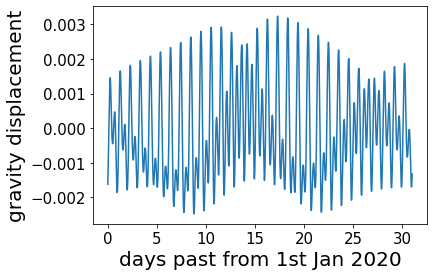

In [19]:
import matplotlib.pyplot as plt
figure,ax=plt.subplots(1,1)
plt.rcParams['figure.figsize']=[10,5]
ax.plot((t-t.min())/(24*60*60),gravityDisp)
ax.set_xlabel("days past from 1st Jan 2020",fontsize=20)
ax.set_ylabel("gravity displacement",fontsize=20)
ax.tick_params(labelsize=15)

In [20]:
t.max()-t.min()

2678400.0